In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('data/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Response Variable

In [15]:
counts = df.groupby(by='target').count()
total_points = len(df)
counts.head()

,id,keyword,location,text
target,,,,
0,4342,4323,2884,4342
1,3271,3229,2196,3271


<BarContainer object of 2 artists>

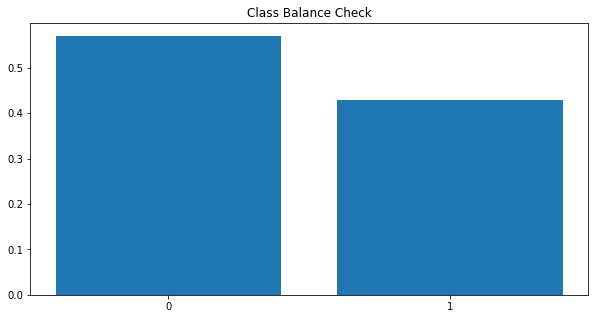

In [18]:
fig = plt.figure(figsize = (10, 5))
plt.title('Class Balance Check')
plt.bar(["0", "1"], counts['id']/total_points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


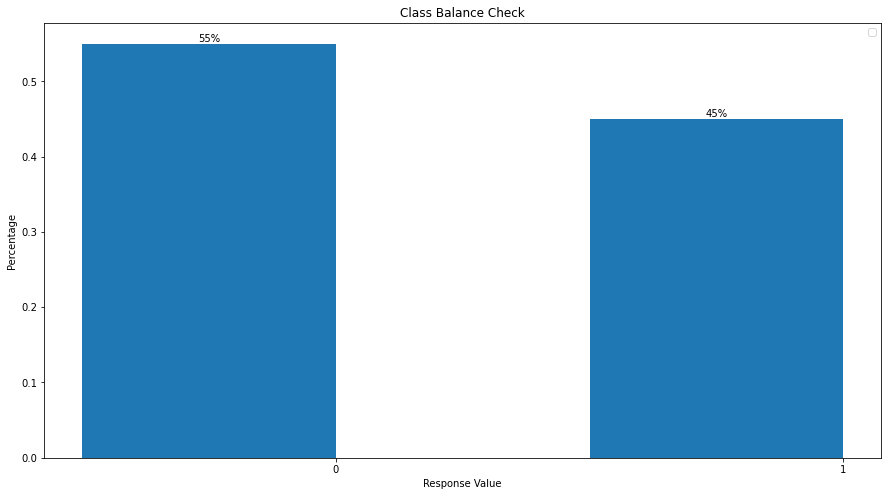

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_with_percentages(x_values, y_values):
    # Create the bar plot
    fig, ax = plt.subplots(figsize=(15, 8))
    index = np.arange(len(data1))
    bar_width = 0.5
    bar1 = ax.bar(index, data1, bar_width)
    
    # Add labels and title
    ax.set_xlabel('Response Value')
    ax.set_ylabel('Percentage')
    ax.set_title('Class Balance Check')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(x_values)
    ax.legend()
    
    # Add text watermarks for the percentages
    for i, bar in enumerate(bar1):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                '{:.0%}'.format(height), ha='center', va='bottom')
    
    # Show the plot
    plt.show()

# Example usage
plot_bar_with_percentages([0, 1], y_values = counts['id']/total_points)

### There is not a significant class imbalance. The non-disaster tweets are higher in number. 

## Predictors